In [1]:
import optim
import numpy as np

In [30]:
from optim.test_function import *
from optim.blackbox.random import RandomOptimizer
from optim.blackbox.cmaes import CMAES

optimizer = CMAES()
rastrigin = CrossInTray(n=2)
print(rastrigin(np.array([1,1])))

x0 = np.zeros(2)+np.random.random_sample()
print("Init : ",x)
def get_local_minima(f, x0, tol=1e-2):
    minima = [ ]
    mult = 1.
    x=x0
    for i in range(100):
        x,_=optimizer.optimize(lambda x: mult*f(x), x0=x,
                              n_samples=10)
        if mult>0:
            ns = np.array([np.linalg.norm(x-o) for o in minima])
            if np.all(ns > tol):
                minima.append(x)
        mult *= -1.
    return minima
minima = get_local_minima(rastrigin, x0)
for x in minima:
    print(x)

-2.03424158303853
Init :  [[-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]
 [-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]
 [-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]
 ...
 [-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]
 [-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]
 [-5.12       -5.01656566 -4.91313131 ...  4.91313131  5.01656566
   5.12      ]]
[0.52160755 0.67931151]


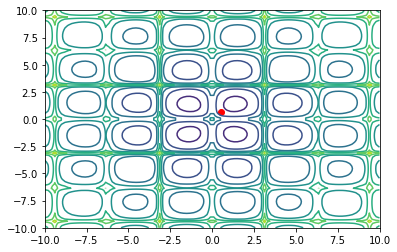

In [31]:
import matplotlib.pyplot as plt
x,y = rastrigin.domain.meshgrid(100)
z = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(y.shape[1]):
        z[i,j]=rastrigin(np.array([x[i,j],y[i,j]]))
plt.contour(x,y,z)
plt.scatter([w[0] for w in minima],
           [w[1] for w in minima],c="r")